<a href="https://colab.research.google.com/github/octaviamardiana/PID-control-system/blob/main/PID%20control%20system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.9 MB/s eta 0:00:00


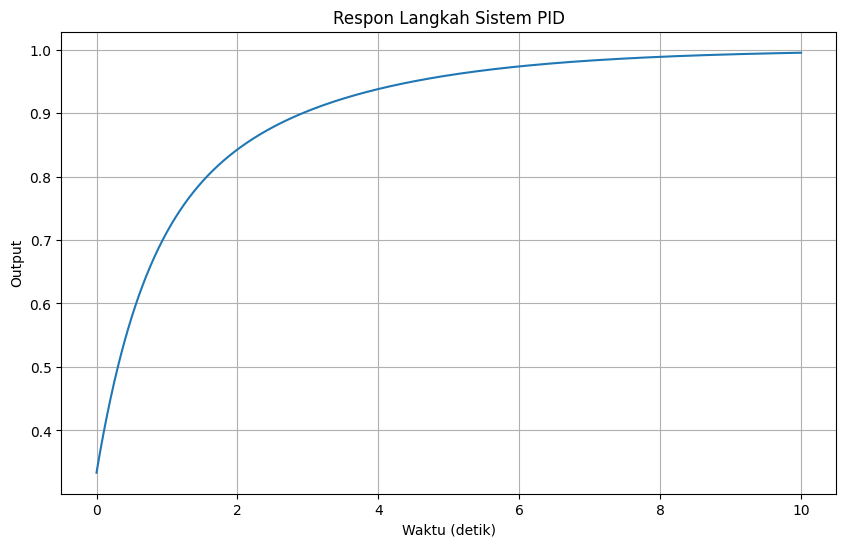

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Install the 'control' package
!pip install control
import control as ctrl

# Define the plant transfer function
num = [1]
den = [1, 1]
plant = ctrl.TransferFunction(num, den)

# Define PID controller parameters
Kp = 2.0
Ki = 1.0
Kd = 0.5

# Create PID controller transfer function
pid = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Calculate closed-loop transfer function
sys_cl = ctrl.feedback(pid * plant, 1)

# Generate step response
t = np.linspace(0, 10, 1000)
t, y = ctrl.step_response(sys_cl, t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Respon Langkah Sistem PID')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid(True)
plt.show()

mencari nilai kp, ki, kd
1. detik ke 2  saat mencapai nilai respon sistem 2 detik tanpa overshoot (stabil)


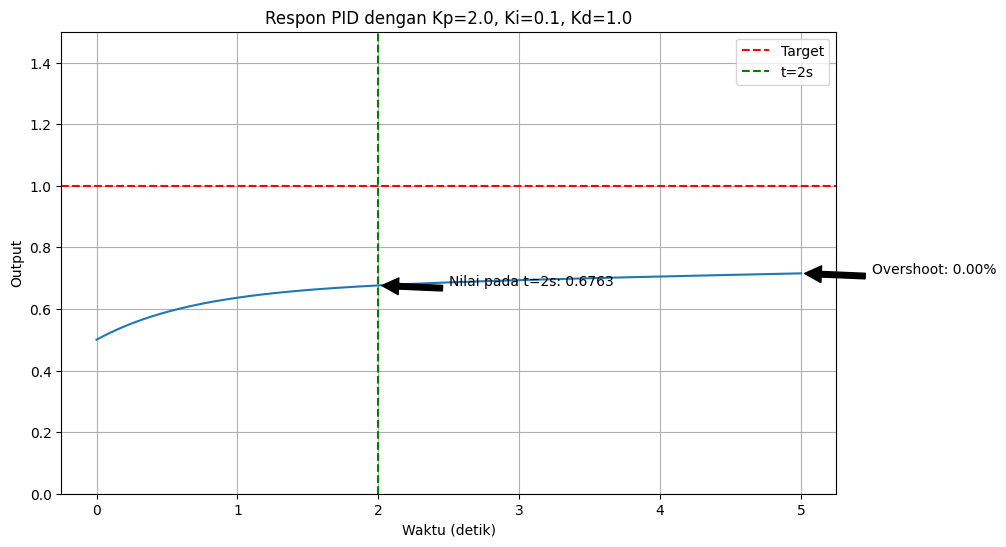

Nilai PID: Kp=2.0, Ki=0.1, Kd=1.0
Nilai pada t=2s: 0.6763
Overshoot: 0.00%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Install the control package if needed
# !pip install control

# Define the plant transfer function
num = [1]
den = [1, 1]
plant = ctrl.TransferFunction(num, den)

# Set nilai PID untuk kasus 1 (mencapai nilai stabil pada detik ke-2)
Kp = 2.0
Ki = 0.1
Kd = 1.0

# Create PID controller transfer function
pid = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Calculate closed-loop transfer function
sys_cl = ctrl.feedback(pid * plant, 1)

# Generate step response
t = np.linspace(0, 5, 500)  # simulasi sampai 5 detik
t, y = ctrl.step_response(sys_cl, t)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.axhline(y=1.0, color='r', linestyle='--', label='Target')
plt.axvline(x=2.0, color='g', linestyle='--', label='t=2s')
plt.title(f'Respon PID dengan Kp={Kp}, Ki={Ki}, Kd={Kd}')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid(True)
plt.ylim(0, 1.5)
plt.legend()

# Tampilkan nilai pada t=2s
value_at_2s = np.interp(2.0, t, y)
plt.annotate(f'Nilai pada t=2s: {value_at_2s:.4f}',
             xy=(2, value_at_2s), xytext=(2.5, value_at_2s),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Cek overshoot
max_value = max(y)
overshoot = (max_value - 1.0) * 100 if max_value > 1.0 else 0
plt.annotate(f'Overshoot: {overshoot:.2f}%',
             xy=(t[np.argmax(y)], max_value),
             xytext=(t[np.argmax(y)] + 0.5, max_value),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# Analisis respon sistem
print(f"Nilai PID: Kp={Kp}, Ki={Ki}, Kd={Kd}")
print(f"Nilai pada t=2s: {value_at_2s:.4f}")
print(f"Overshoot: {overshoot:.2f}%")

# Cek waktu settling (±2% dari nilai akhir)
settle_indices = np.where(np.logical_and(y >= 0.98, y <= 1.02))[0]
if len(settle_indices) > 0:
    settle_time = t[settle_indices[0]]
    print(f"Waktu settling (±2%): {settle_time:.2f} detik")

2. detik ke 20 dia mencapai 1,respon ak lambat (tanpa overshoot dan osilasi)


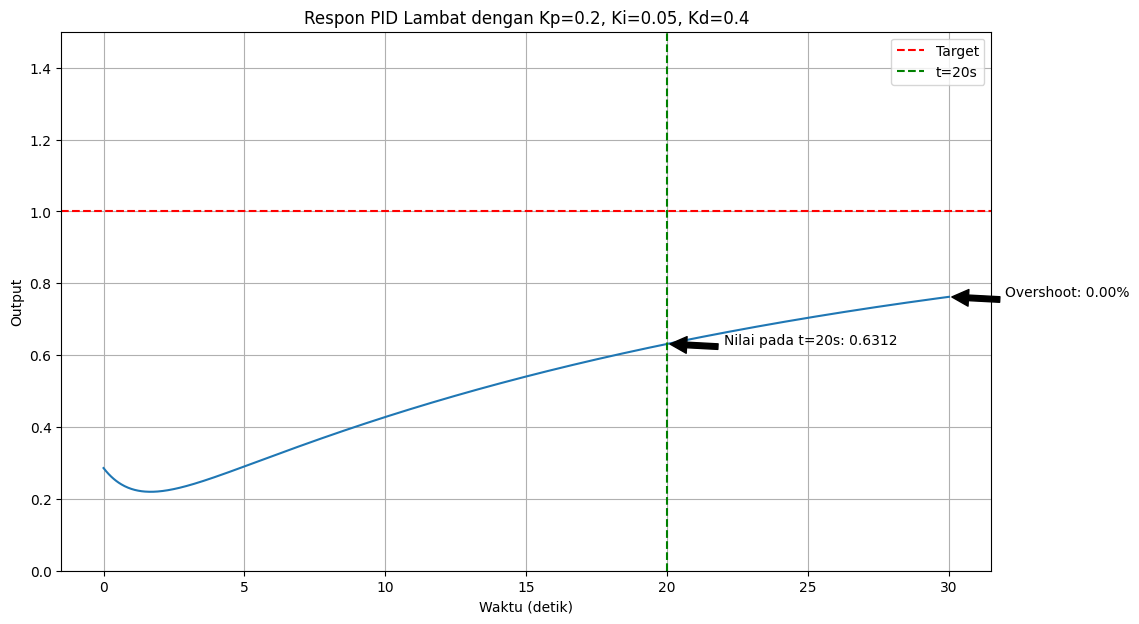

Nilai PID: Kp=0.2, Ki=0.05, Kd=0.4
Nilai pada t=20s: 0.6312
Overshoot: 0.00%
Tidak terdeteksi osilasi


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Install the control package if needed
# !pip install control

# Define the plant transfer function
num = [1]
den = [1, 1]
plant = ctrl.TransferFunction(num, den)

# Set nilai PID untuk kasus 2 (respons lambat mencapai nilai 1 pada detik ke-20)
# Untuk respons lambat, kita gunakan nilai Kp dan Ki yang kecil
Kp = 0.2
Ki = 0.05
Kd = 0.4

# Create PID controller transfer function
pid = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Calculate closed-loop transfer function
sys_cl = ctrl.feedback(pid * plant, 1)

# Generate step response
t = np.linspace(0, 30, 1000)  # simulasi sampai 30 detik untuk melihat respons lengkap
t, y = ctrl.step_response(sys_cl, t)

# Plot hasil
plt.figure(figsize=(12, 7))
plt.plot(t, y)
plt.axhline(y=1.0, color='r', linestyle='--', label='Target')
plt.axvline(x=20.0, color='g', linestyle='--', label='t=20s')
plt.title(f'Respon PID Lambat dengan Kp={Kp}, Ki={Ki}, Kd={Kd}')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid(True)
plt.ylim(0, 1.5)
plt.legend()

# Tampilkan nilai pada t=20s
value_at_20s = np.interp(20.0, t, y)
plt.annotate(f'Nilai pada t=20s: {value_at_20s:.4f}',
             xy=(20, value_at_20s), xytext=(22, value_at_20s),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Cek overshoot
max_value = max(y)
overshoot = (max_value - 1.0) * 100 if max_value > 1.0 else 0
plt.annotate(f'Overshoot: {overshoot:.2f}%',
             xy=(t[np.argmax(y)], max_value),
             xytext=(t[np.argmax(y)] + 2, max_value),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# Analisis respon sistem
print(f"Nilai PID: Kp={Kp}, Ki={Ki}, Kd={Kd}")
print(f"Nilai pada t=20s: {value_at_20s:.4f}")
print(f"Overshoot: {overshoot:.2f}%")

# Cek waktu settling (±2% dari nilai akhir)
settle_indices = np.where(np.logical_and(y >= 0.98, y <= 1.02))[0]
if len(settle_indices) > 0:
    settle_time = t[settle_indices[0]]
    print(f"Waktu settling (±2%): {settle_time:.2f} detik")

# Deteksi osilasi dengan menghitung puncak-puncak lokal
from scipy.signal import find_peaks
peaks, _ = find_peaks(y)
if len(peaks) > 1:
    print(f"Jumlah puncak terdeteksi: {len(peaks)} (menunjukkan osilasi)")
    peak_values = y[peaks]
    peak_times = t[peaks]
    print(f"Nilai puncak: {peak_values}")
    print(f"Waktu puncak: {peak_times}")
else:
    print("Tidak terdeteksi osilasi")

3. didetik ke 20 baru mencapai nilai stabil

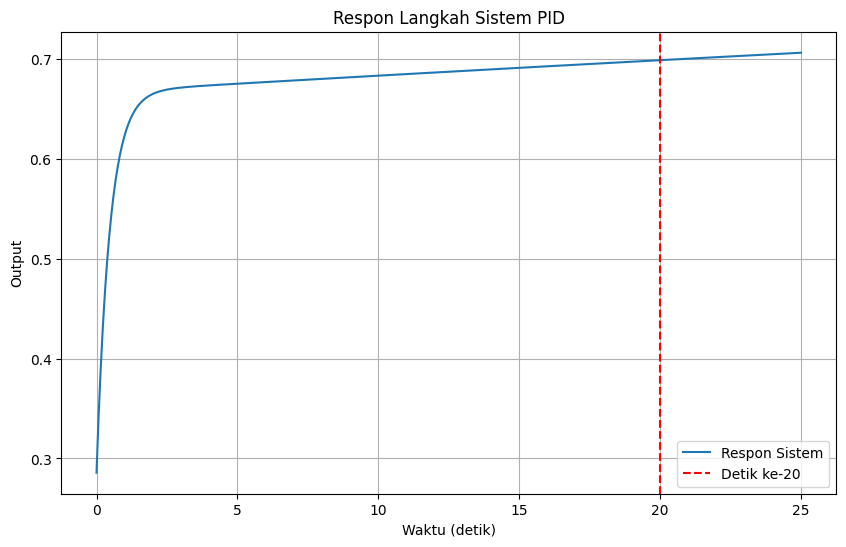

In [27]:
import numpy as np
import matplotlib.pyplot as plt
# Install the 'control' package jika belum ada
# !pip install control
import control as ctrl

# Define the plant transfer function
num = [1]
den = [1, 1]
plant = ctrl.TransferFunction(num, den)

# Define PID controller parameters
Kp = 2.0
Ki = 0.015
Kd = 0.4

# Create PID controller transfer function
pid = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Calculate closed-loop transfer function
sys_cl = ctrl.feedback(pid * plant, 1)

# Generate step response sampai 25 detik agar terlihat stabil di detik ke-20
t = np.linspace(0, 25, 1000)
t, y = ctrl.step_response(sys_cl, t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Respon Sistem')
plt.axvline(x=20, color='r', linestyle='--', label='Detik ke-20')
plt.title('Respon Langkah Sistem PID')
plt.xlabel('Waktu (detik)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()
